<a href="https://colab.research.google.com/github/carolinilaila/quarentena_dados/blob/master/QuarentenaDadosAula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# importando dados direto do GitHub do Professor e definindo nome de variáveis para cada tabela
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [304]:
# Trocando nome das colunas

filmes.columns = ["filmeId", "titulo", "genero"]
avaliacoes.columns = ["usuarioId", "filmeId", "media","momento"]
avaliacoes.head()

,usuarioId,filmeId,media,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [303]:
# Criando um dataframe com o valor da nota(média) e agrupando na tabela avaliações 

notas_medias_por_filme = avaliacoes.groupby("filmeId")["media"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.columns = ["filmeId", "titulo", "genero", "media"]
filmes_com_media.head()

,filmeId,titulo,genero,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [302]:
# Arredondar valores de media para 2 casas decimais

fimes_com_media = filmes_com_media.round({'media': 2})
filmes_com_media

,filmeId,titulo,genero,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [301]:
# Separa a lista "genero" em série e soma as séries e colocar em ordem decrescente

filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [300]:
# Separa a lista "genero" em série e ordena pelo indice (ordem alfabética)

filmes["genero"].str.get_dummies('|').sum().sort_index(ascending=False)

Western                167
War                    382
Thriller              1894
Sci-Fi                 980
Romance               1596
Mystery                573
Musical                334
IMAX                   158
Horror                 978
Film-Noir               87
Fantasy                779
Drama                 4361
Documentary            440
Crime                 1199
Comedy                3756
Children               664
Animation              611
Adventure             1263
Action                1828
(no genres listed)      34
dtype: int64

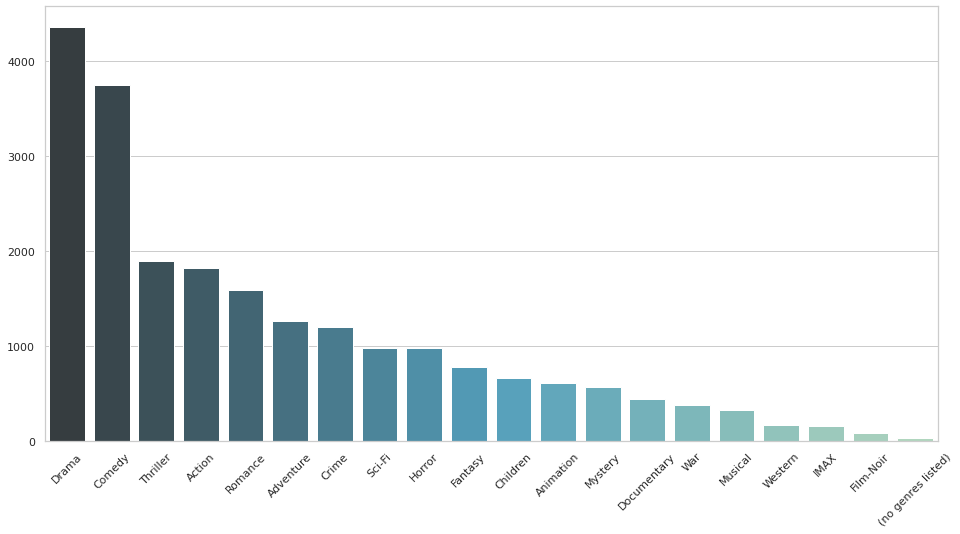

In [299]:
# DESAFIO 1 - Rotacionar os ticks(os nomes dos gêneros)
sns.set_style("whitegrid")
filmes_por_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette = sns.color_palette("GnBu_d", n_colors=len(filmes_por_genero + 4)))
plt.show()


3.9209302325581397


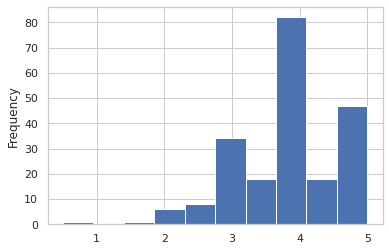

In [298]:
# Gráfico da média de votos para o filme1, Toy Story

notas_do_filme_1 = avaliacoes.query("filmeId==1")["media"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')


In [297]:
# Buscando no range entre 2450:2500 a média de filmes

filmes_com_media.sort_values("media", ascending=False)[1050:1100]

,filmeId,titulo,genero,media
2276,3019,Drugstore Cowboy (1989),Crime|Drama,4.150000
905,1203,12 Angry Men (1957),Drama,4.149123
2372,3147,"Green Mile, The (1999)",Crime|Drama,4.148649
596,741,Ghost in the Shell (Kôkaku kidôtai) (1995),Animation|Sci-Fi,4.148148
1730,2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,4.147727
4176,6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,4.146667
1503,2028,Saving Private Ryan (1998),Action|Drama|War,4.146277
2290,3037,Little Big Man (1970),Western,4.145833
903,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,4.145833
983,1284,"Big Sleep, The (1946)",Crime|Film-Noir|Mystery,4.142857


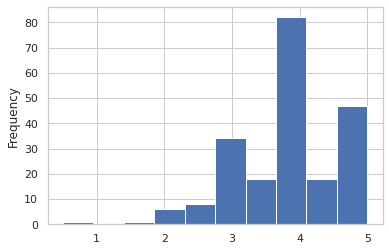

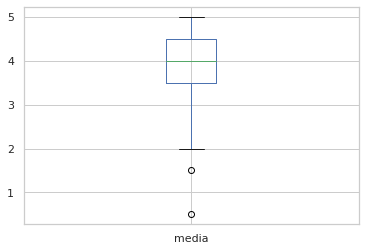

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: media, dtype: float64

In [296]:
# Função que mostra a média de cada filme em gráfico

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["media"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()
plot_filme(1) 

In [0]:
# DESAFIO 2 - Comparar outros filmes com notas próximas e achar distribuições bem diferentes

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["media"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    88.000000
mean      4.136364
std       0.819052
min       0.500000
25%       4.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: media, dtype: float64

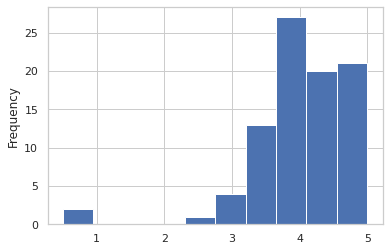

In [294]:
# DESAFIO 2 - Comparar outros filmes com notas próximas e achar distribuições bem diferentes

plot_filme(68157)# Inglourious Basterds (2009)

count    7.000000
mean     4.142857
std      0.748013
min      3.000000
25%      3.750000
50%      4.000000
75%      4.750000
max      5.000000
Name: media, dtype: float64

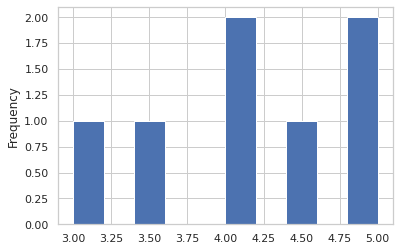

In [293]:
# DESAFIO 2 - Comparar outros filmes com notas próximas e achar distribuições bem diferentes

plot_filme(168248	)# John Wick: Chapter Two (2017)

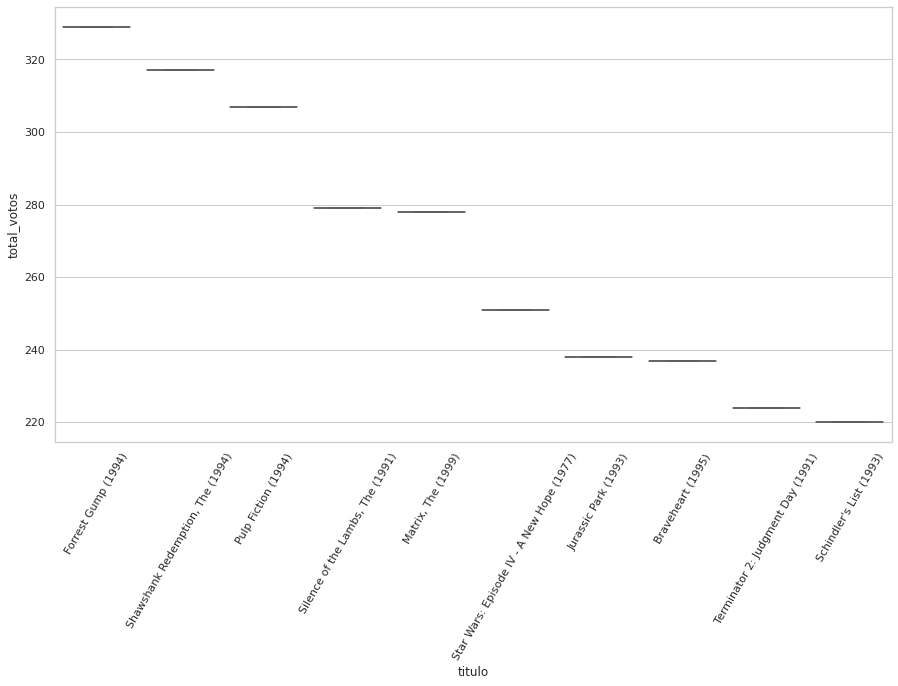

In [292]:
# DESAFIO 3/4 - Criar o boxplot dos 10 filmes com mais votos(não é com maior média, é com mais votos) pelo @paulo_caelum (não finalizado)

votos_por_filme = avaliacoes.groupby('filmeId').size()
votos_por_filme.name = 'total_votos'
filmes_com_media_votos = filmes_com_media.join(votos_por_filme, on='filmeId')
filmes_com_media_votos
top10 = filmes_com_media_votos.sort_values("total_votos",ascending=False)
top10 = top10.head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
sns.boxplot(x="titulo", y="total_votos", data = top10, palette="Set3", saturation=0.75, width=.8) 

In [0]:
# DESAFIO 5- Calcular moda, média, mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
# DESAFIO 6 - Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas)

In [0]:
# DESAFIO 7 - Gráfico de notas média por ano  (separar o ano primeiro)

# Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no twitter ou linkedin. Boa sorte!